# Plot of Cavity valtage 

当腔压关闭时，腔场随时间变化为：
$$
V = V_{0} \times e^{t/\tau}
$$

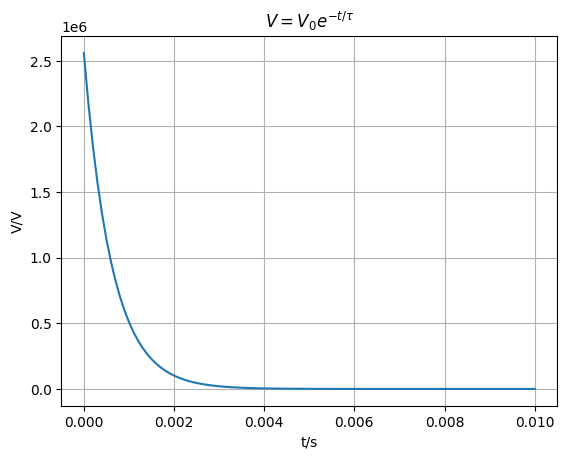

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def V(t, V0, tau):
    return V0 * np.exp(-t/tau)

# 参数
V0 = 2.56e6
tau = 0.62e-3

# 生成横坐标数据
t = np.linspace(0, 1e-2, 100)  # 生成0到5之间的100个点

# 计算纵坐标数据
v = V(t, V0, tau)

# 绘图
plt.plot(t, v)
plt.xlabel('t/s')
plt.ylabel('V/V')
plt.title('$V=V_{0} e^{-t/τ}$')
plt.grid(True)
plt.show()


# Iteration Algorithm

$$
\begin{array}{l}
\Delta f_{L}\left(t_{n+1}\right)=\Delta f_{L}\left(t_{n}\right)+\Delta t \cdot \Delta \dot{f}_{L}\left(t_{n}\right)\\
\Delta \dot{f}_{L}\left(t_{n+1}\right)=\Delta \dot{f}_{L}\left(t_{n}\right)+\Delta t \cdot \Delta \ddot{f}_{L}\left(t_{n}\right)
\end{array}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义V(t)函数
def V(t, V0, tau):
    return V0 * np.exp(t/tau)

# 定义参数
omega_m = 2 * np.pi * 216
k_L = 0.26e-12
V0 = 2.56e6
tau = 0.62e-3
tau_m = 1e-3

# 定义微分方程
def delta_f_double_dot(t, delta_f, delta_f_dot):
    return -omega_m**2 * k_L * V(t, V0, tau)**2 - 2/tau_m * delta_f_dot - omega_m**2 * delta_f

# 初始化时间参数和初始条件
T = 1e-10  # 时间步长
t_points = np.arange(0, 0.001, T)  # 时间点数组
delta_f = np.zeros(len(t_points))
delta_f_dot = np.zeros(len(t_points))
delta_f[0] = -k_L * V0**2  # 初始条件
delta_f_dot[0] = 0  # 初始条件

# 使用欧拉方法进行离散求解
for i in range(len(t_points) - 1):
    delta_f_double_dot_i = delta_f_double_dot(t_points[i], delta_f[i], delta_f_dot[i])
    delta_f_dot[i+1] = delta_f_dot[i] + T * delta_f_double_dot_i
    delta_f[i+1] = delta_f[i] + T * delta_f_dot[i]

# 绘制结果
plt.plot(t_points, delta_f)
plt.xlabel('t')
plt.ylabel('$\Delta f_L$')
plt.title('$\Delta f_L$随时间的变化')
plt.grid(True)
plt.show()